In [47]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import matplotlib.image as mpimg
import random
import cv2
import xml.etree.ElementTree as ET


In [39]:
ROOT = os.getcwd()

DATASET_IMAGES_LABELED = ROOT + "\\dataset\\images_with_label"
DATASET_IMAGES_NOT_LABELED = ROOT + "\\dataset\\images_without_labels"
DATASET_LABELS = ROOT + "\\dataset\\labels"

In [40]:
print("Images labeled = %d" % len(os.listdir(DATASET_IMAGES_LABELED)))
print("Labels = %d" % len(os.listdir(DATASET_LABELS)))
print("Images NOT labeled = %d" % len(os.listdir(DATASET_IMAGES_NOT_LABELED)))

Images labeled = 3741
Labels = 3741
Images NOT labeled = 3356


A not labeled image, means that the image does not have a swimming pool

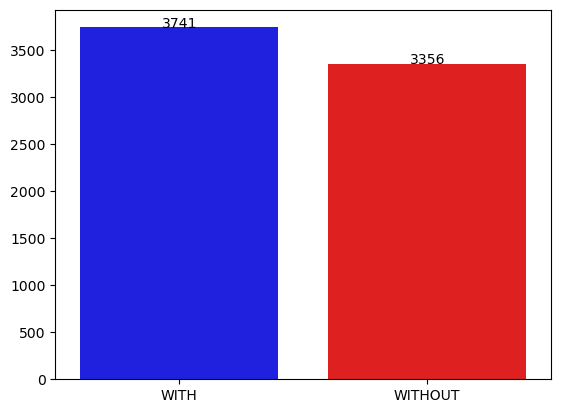

In [41]:
y = [len(os.listdir(DATASET_IMAGES_LABELED)), len(os.listdir(DATASET_IMAGES_NOT_LABELED))]
x = ["WITH", "WITHOUT"]

sns.barplot(x=x, y=y, palette=["blue", "red"])

# Add values above each bar
for i in range(len(x)):
    plt.text(i, y[i] + 0.5, str(y[i]), ha='center')

plt.show()

# Displaying 5 random images

In [42]:
def change_name_to_xml(file):
    splitted = file.split(".")
    final = ""
    if len(splitted) > 2:
        final = ".".join(splitted[0:2]) + ".xml"
    else:
        final = splitted[0] + ".xml"

    return final

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


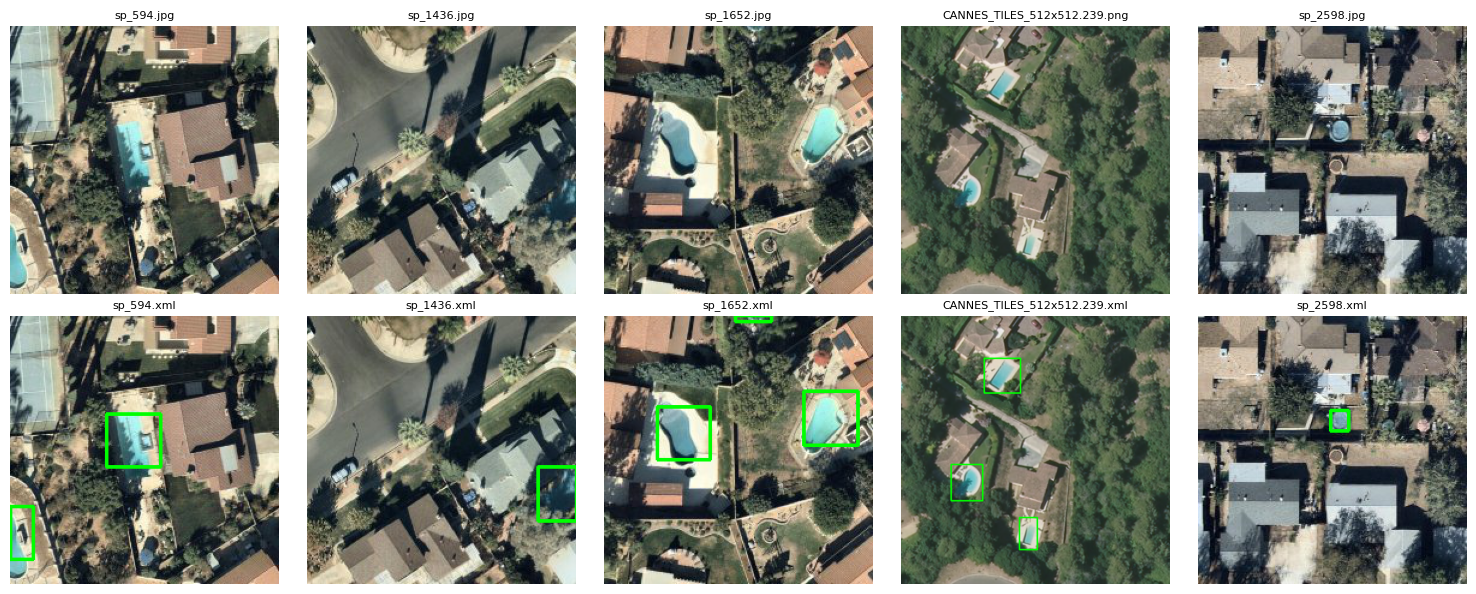

In [54]:
files1 = os.listdir(DATASET_IMAGES_LABELED)
random.shuffle(files1)
selected_files1 = files1[:5]

selected_files2 = list(map(lambda v: change_name_to_xml(v), selected_files1))

selected_files1, selected_files2

# Plot the images and draw bounding boxes from XML content
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    image1_path = os.path.join(DATASET_IMAGES_LABELED, selected_files1[i])
    image1 = mpimg.imread(image1_path)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(selected_files1[i], fontsize=8)

    plt.subplot(2, 5, i + 6)
    xml_file_path = os.path.join(DATASET_LABELS, selected_files2[i])
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    
    # Read image dimensions
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    
    # Create a blank image to draw bounding boxes
    img_with_boxes = image1.copy()
    
    # Draw bounding boxes on the image
    for obj in root.findall('object'):
        xmin = int(float(obj.find('bndbox/xmin').text))
        ymin = int(float(obj.find('bndbox/ymin').text))
        xmax = int(float(obj.find('bndbox/xmax').text))
        ymax = int(float(obj.find('bndbox/ymax').text))
        cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.title(selected_files2[i], fontsize=8)

plt.tight_layout()
plt.show()